Now i know

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential(
    [Dense(64, activation='relu'),
     Dense(32, activation='relu'),
     Dense(10)])
optimizer = Adam(learning_rate=0.001)

Function for dividing to validation and train 

And changing y_train to be probabilistic prediction of number.

For example: 1 -> [0,1,0,0,0,0,0,0,0,0]

In [5]:
def divide_to_val_and_train(df, percentage):
    length = len(df)
    train_len = math.floor(length / 5 * 4)
    x_train = np.array(df.iloc[:train_len, 1:])
    y_train = np.array(df.iloc[:train_len, 0])
    x_val = np.array(df.iloc[train_len:, 1:])
    y_val = np.array(df.iloc[train_len:, 0])

    return x_train, y_train, x_val, y_val

def y_to_prob(y, label_len=10):
    prob_y = np.zeros((len(y), label_len))
    for i in range(len(y)):
        num = y[i]
        prob_y[i][num] = 1
    return prob_y

def prob_to_y(y, label_len=10):
    real_y = np.zeros((len(y), ))
    for i in range(len(y)):
        for j in range(label_len):
            if y[i][j]==1:
                real_y[i] = j
    return real_y
            
def printarr(arr, length=10):
    for i in range(length):
        print(arr[i])

In [6]:
x_test = np.array(test.iloc[:, :])
x_train, y_train, x_val, y_val = divide_to_val_and_train(df=train,
                                                              percentage=0.8)
y_train = y_to_prob(y_train)
y_val = y_to_prob(y_val)
printarr(y_train)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
loss = CategoricalCrossentropy(from_logits=True)

In [8]:
model.compile(optimizer,loss)

In [9]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1050/1050 [==============================] - 2s 2ms/step - loss: 2.1155
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5722
Epoch 3/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4111
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3365
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2658
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2394
Epoch 7/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2133
Epoch 8/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1825
Epoch 9/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1654
Epoch 10/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1409
Epoch 11/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1275
Epoch 12/100
1050/1050 [==============================] - 2s 2ms/step - lo

1050/1050 [==============================] - 2s 2ms/step - loss: 0.0504
Epoch 98/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0349
Epoch 99/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0421
Epoch 100/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0465


In [10]:
from tensorflow.keras.activations import softmax
pred_train = model(x_train)
pred_train = softmax(pred_train)
pred_train = np.round(pred_train)

pred_val = model(x_val)
pred_val = softmax(pred_val)
pred_val = np.round(pred_val)

In [11]:
def compare_results(pred,y):
    same_results = 0
    for i in range(len(y)):
        same_results += np.array_equal(y[i],pred[i])#y[i][:]==pred[i][:] np 
    same_results = same_results/len(y)
    return same_results
    

In [12]:
val_acc = compare_results(pred_val,y_val)
print(val_acc)
train_acc = compare_results(pred_train,y_train)
print(train_acc)

0.9567857142857142
0.986845238095238


Here i will try to show the ones i predict wrong

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
y_val = prob_to_y(y_val)
pred_val = prob_to_y(pred_val)

In [14]:
def get_wrong_results_index(pred,y,x):
    wrong_results = []
    for i in range(len(y)):
        if np.array_equal(y[i],pred[i]) == 0:
            wrong_results.append(i)
    return wrong_results


In [15]:
w_r_i = get_wrong_results_index(pred_val,y_val,x_val)
wrong_x = x_val[w_r_i]
wrong_y = y_val[w_r_i]
wrong_pred = pred_val[w_r_i]

print('right predictions:',len(y_val)-len(w_r_i))
print('wrong predictions:',len(w_r_i))

right predictions: 8068
wrong predictions: 332


In [16]:
def show_wrong_pred(r):
    for i in r:
        f = plt.figure()
        f.set_figwidth(0.5)
        f.set_figheight(0.5)
        first_wrong_x = wrong_x[i]
        first_wrong_x = np.resize(first_wrong_x, (28, 28))
        first_wrong_x
        plt.imshow(first_wrong_x,cmap='gray')
        plt.show()
        print('y:',wrong_y[i])
        print('preddiction:',wrong_pred[i])
    

Pretty straightforward analysis but it may work and looks good :D

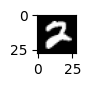

y: 2.0
preddiction: 7.0


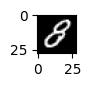

y: 8.0
preddiction: 0.0


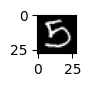

y: 5.0
preddiction: 8.0


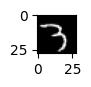

y: 3.0
preddiction: 7.0


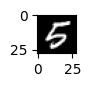

y: 5.0
preddiction: 6.0


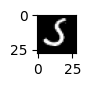

y: 5.0
preddiction: 3.0


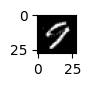

y: 9.0
preddiction: 0.0


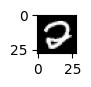

y: 2.0
preddiction: 0.0


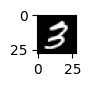

y: 3.0
preddiction: 2.0


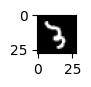

y: 3.0
preddiction: 7.0


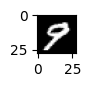

y: 9.0
preddiction: 8.0


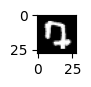

y: 7.0
preddiction: 0.0


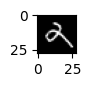

y: 2.0
preddiction: 9.0


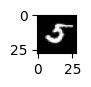

y: 5.0
preddiction: 4.0


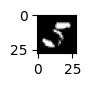

y: 5.0
preddiction: 3.0


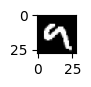

y: 9.0
preddiction: 4.0


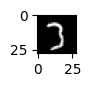

y: 3.0
preddiction: 7.0


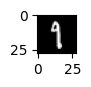

y: 9.0
preddiction: 1.0


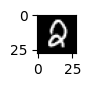

y: 2.0
preddiction: 0.0


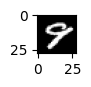

y: 9.0
preddiction: 8.0


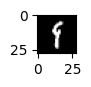

y: 9.0
preddiction: 0.0


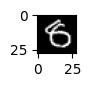

y: 8.0
preddiction: 0.0


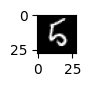

y: 5.0
preddiction: 6.0


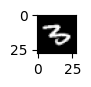

y: 3.0
preddiction: 7.0


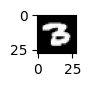

y: 3.0
preddiction: 7.0


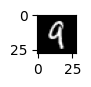

y: 9.0
preddiction: 0.0


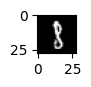

y: 8.0
preddiction: 1.0


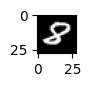

y: 8.0
preddiction: 2.0


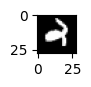

y: 2.0
preddiction: 4.0


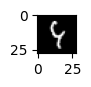

y: 9.0
preddiction: 4.0


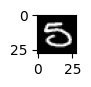

y: 5.0
preddiction: 0.0


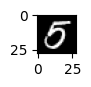

y: 5.0
preddiction: 0.0


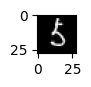

y: 5.0
preddiction: 3.0


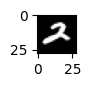

y: 2.0
preddiction: 7.0


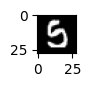

y: 5.0
preddiction: 3.0


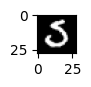

y: 5.0
preddiction: 0.0


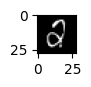

y: 2.0
preddiction: 3.0


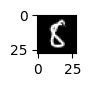

y: 8.0
preddiction: 5.0


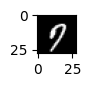

y: 7.0
preddiction: 9.0


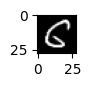

y: 6.0
preddiction: 5.0


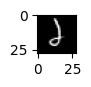

y: 2.0
preddiction: 0.0


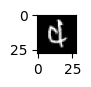

y: 4.0
preddiction: 0.0


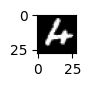

y: 4.0
preddiction: 6.0


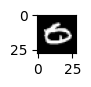

y: 0.0
preddiction: 6.0


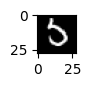

y: 5.0
preddiction: 9.0


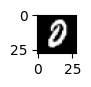

y: 0.0
preddiction: 8.0


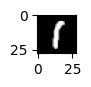

y: 1.0
preddiction: 8.0


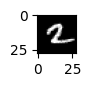

y: 2.0
preddiction: 1.0


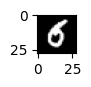

y: 6.0
preddiction: 0.0


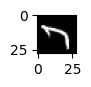

y: 7.0
preddiction: 5.0


In [17]:
show_wrong_pred(range(50))

Lets take our results to use in kaggle

In [18]:
pred_test = model(x_test)
pred_test = softmax(pred_test)
pred_test = np.round(pred_test)
pred_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [19]:
pred_df = pd.DataFrame({'ImageId': []})
pred_df
pred_nums = np.empty((28000,))
for i in range(len(pred_test)):
    pred_nums[i] = i+1 
pred_nums = pred_nums.astype(int)
pred_df['ImageId'] = pred_nums
pred_df

,ImageId
0,1
1,2
2,3
3,4
4,5
...,...
27995,27996
27996,27997
27997,27998
27998,27999


In [20]:
pred_test = prob_to_y(pred_test)
pred_test = pred_test.astype(int)

In [21]:
pred_df['label'] = pred_test

In [22]:
pred_df

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [23]:
pred_df.to_csv(index=False)

'ImageId,label\n1,2\n2,0\n3,9\n4,0\n5,3\n6,7\n7,0\n8,3\n9,0\n10,3\n11,5\n12,7\n13,4\n14,0\n15,4\n16,0\n17,3\n18,1\n19,9\n20,0\n21,9\n22,1\n23,1\n24,5\n25,7\n26,4\n27,2\n28,7\n29,4\n30,7\n31,7\n32,5\n33,4\n34,2\n35,6\n36,2\n37,5\n38,5\n39,1\n40,6\n41,7\n42,7\n43,4\n44,9\n45,8\n46,7\n47,8\n48,0\n49,6\n50,7\n51,6\n52,8\n53,8\n54,3\n55,8\n56,2\n57,1\n58,2\n59,2\n60,0\n61,4\n62,1\n63,7\n64,0\n65,0\n66,0\n67,1\n68,9\n69,0\n70,1\n71,6\n72,5\n73,8\n74,8\n75,2\n76,8\n77,5\n78,9\n79,2\n80,3\n81,5\n82,9\n83,1\n84,0\n85,9\n86,2\n87,4\n88,3\n89,6\n90,7\n91,2\n92,0\n93,6\n94,6\n95,1\n96,4\n97,3\n98,9\n99,7\n100,4\n101,0\n102,3\n103,2\n104,0\n105,7\n106,3\n107,0\n108,5\n109,0\n110,8\n111,0\n112,0\n113,4\n114,7\n115,1\n116,7\n117,1\n118,1\n119,3\n120,3\n121,3\n122,7\n123,2\n124,8\n125,6\n126,3\n127,8\n128,7\n129,8\n130,4\n131,3\n132,5\n133,6\n134,0\n135,0\n136,0\n137,3\n138,1\n139,5\n140,6\n141,4\n142,3\n143,4\n144,5\n145,5\n146,8\n147,7\n148,7\n149,2\n150,8\n151,4\n152,3\n153,5\n154,6\n155,5\n156,3\n

In [24]:
from pathlib import Path
filepath = Path('/home/turabi/Desktop/Kaggle comps/kaggleenv/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
pred_df.to_csv(filepath,index=False)

Finito